In [9]:
import pandas as pd

In [10]:
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [11]:
#Juntando os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
df.shape

(894, 5)

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
135,Salvador,2019-03-02,9.95,1037,3
11,Aracaju,2019-01-01,161.53,1520,4
69,Recife,2019-01-01,38.83,981,1
140,Recife,2019-03-02,166.89,983,5
113,Natal,2019-01-02,18.90,1034,3


In [ ]:
df["Cidade"].unique()

array(['Aracaju', 'Fortaleza', 'Natal', 'Recife', 'Salvador'],
      dtype=object)

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Alterando o tipo de dados de uma coluna
df["LojaID"] = df["LojaID"].astype("object")
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
#Consultano linhas com valores nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Substituindo valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
df["Vendas"].mean()

122.61180089485458

In [ ]:
#Substituindo valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Apagando linhas com valores nulos
df.dropna(inplace=True)
df.shape

(894, 5)

In [ ]:
#Apagando linhas com valores nulos em apenas uma coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#Apagando linhas com valores nulos em todas as colunas
df.dropna(how="all", inplace=True)

**Criando colunas novas**

In [38]:
#Criado coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

#ou: df["Receita"] = df["Vendas"] * df["Qtde"]
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Mes_Venda,Dia_Venda,Ano_Venda,diferenca_dias,trimestre_venda,Receita
0,Aracaju,2018-01-01,142.00,1520,1,1,1,2018,0 days,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,1,1,2018,0 days,1,85.26
2,Aracaju,2018-01-01,71.55,1520,1,1,1,2018,0 days,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,1,1,2018,0 days,1,21.07
4,Aracaju,2018-01-01,24.51,1522,8,1,1,2018,0 days,1,196.08


In [ ]:
#Criado coluna de receita
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [ ]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [ ]:
#Retornando Top 3 de Receita
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
#Retornando os 3 menores de Receita
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
df.sort_values("Receita", ascending=True).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Salvador,2019-01-01,4.57,1035,1,4.57
92,Natal,2019-01-02,4.57,1035,1,4.57
95,Salvador,2019-01-01,5.13,1035,1,5.13
95,Natal,2019-01-02,5.13,1035,1,5.13
161,Salvador,2019-01-02,5.80,1036,1,5.80
161,Natal,2019-01-02,5.80,1036,1,5.80
216,Natal,2019-01-02,5.82,1035,1,5.82
216,Salvador,2019-01-02,5.82,1035,1,5.82


**Aula 5: Trabalhando com datas**

In [ ]:
#Transformano a coluna de data em tipo inteira
df["Data"] = df["Data"].astype("int64")
df.dtypes

<ipython-input-72-98296201962f>:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df["Data"] = df["Data"].astype("int64")


Cidade      object
Data         int64
Vendas     float64
LojaID       int64
Qtde         int64
Receita    float64
dtype: object

In [ ]:
df["Data"] = pd.to_datetime(df["Data"])
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
dtype: object

In [ ]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [13]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Mes_Venda,Dia_Venda,Ano_Venda
8,Salvador,2019-02-11,4.96,1036,2,2,11,2019
105,Natal,2019-01-02,32.83,1037,1,1,2,2019
76,Natal,2019-02-20,364.00,853,2,2,20,2019
97,Aracaju,2018-01-01,32.69,1521,5,1,1,2018
136,Recife,2019-03-02,39.09,982,4,3,2,2019


In [17]:
#Criando uma nova coluna com o mês e o dia
df["Mes_Venda"], df["Dia_Venda"] = df["Data"].dt.month, df["Data"].dt.day
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Mes_Venda,Dia_Venda,Ano_Venda
177,Salvador,2019-01-02,41.19,1037,2,1,2,2019
2,Salvador,2019-02-10,173.59,1035,3,2,10,2019
34,Aracaju,2018-01-01,38.25,1521,6,1,1,2018
90,Aracaju,2018-01-01,16.27,1522,1,1,1,2018
216,Salvador,2019-01-02,5.82,1035,1,1,2,2019


In [19]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [52]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Mes_Venda,Dia_Venda,Ano_Venda,diferenca_dias,trimestre_venda,Receita
137,Recife,2019-03-02,51.99,983,3,3,2,2019,425 days,1,155.97
110,Fortaleza,2019-03-02,51.98,983,6,3,2,2019,425 days,1,311.88
105,Aracaju,2018-01-01,24.81,1520,5,1,1,2018,0 days,1,124.05
64,Salvador,2019-01-01,37.96,1037,3,1,1,2019,365 days,1,113.88
56,Fortaleza,2019-01-01,18.43,1002,1,1,1,2019,365 days,1,18.43


In [48]:
#Crindo coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Mes_Venda,Dia_Venda,Ano_Venda,diferenca_dias,trimestre_venda,Receita
8,Natal,2019-03-27,667.00,852,4,3,27,2019,450 days,1,2668.00
178,Natal,2019-01-02,39.28,1037,3,1,2,2019,366 days,1,117.84
150,Salvador,2019-01-02,11.13,1035,2,1,2,2019,366 days,1,22.26
29,Natal,2019-03-09,646.00,854,2,3,9,2019,432 days,1,1292.00
90,Natal,2019-01-02,100.54,1036,2,1,2,2019,366 days,1,201.08


In [26]:
#Filtrando as vendas de mar/19
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]
vendas_marco_19.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Mes_Venda,Dia_Venda,Ano_Venda,diferenca_dias,trimestre_venda
124,Recife,2019-03-02,47.98,983,7,3,2,2019,425 days,1
126,Salvador,2019-03-02,41.69,1036,2,3,2,2019,425 days,1
138,Fortaleza,2019-03-02,150.38,983,6,3,2,2019,425 days,1
32,Natal,2019-03-17,244.00,854,2,3,17,2019,440 days,1
126,Recife,2019-03-02,41.87,980,8,3,2,2019,425 days,1


In [29]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

**Aula 6: Visualização de dados**

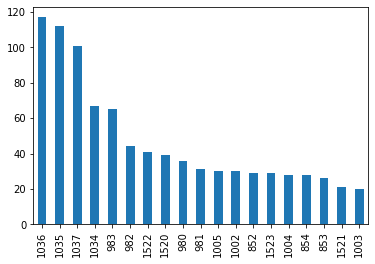

In [30]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

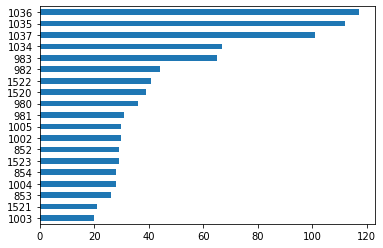

In [34]:
#Gráfico de barras horizontais
# ";" no final do gráfico para tirar texto
df["LojaID"].value_counts(ascending=True).plot.barh();

In [42]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [41]:
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

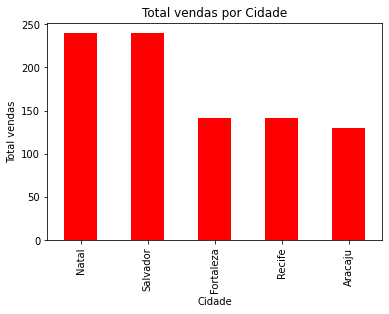

In [46]:
#Adicionando um título e alterando o nome dos eixos

df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

In [ ]:
import matplotlib.pyplot as plt

#Alerando o estilo (global)
plt.style.use("ggplot")

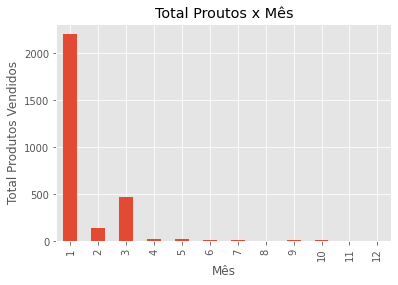

In [65]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot.bar(title= "Total Proutos x Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend;

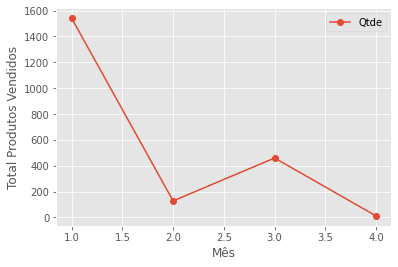

In [70]:
#Selecionando as vendas de 2019

df_2019 = df[df["Ano_Venda"] == 2019]

df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

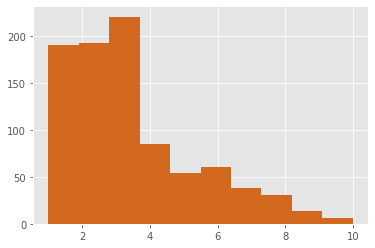

In [77]:
#Histograma
plt.hist(df["Qtde"], color="chocolate");

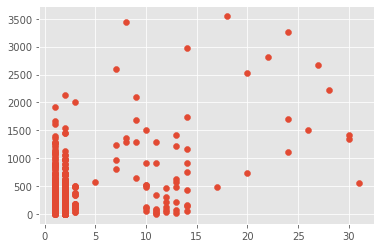

In [76]:
#Gráfico de dispersão
plt.scatter(x=df_2019["Dia_Venda"], y=df_2019["Receita"])

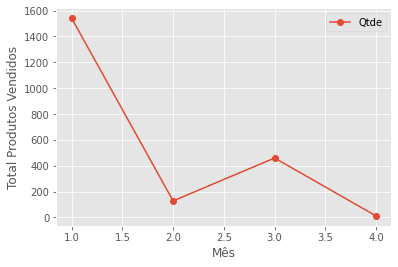

In [78]:
#Salvando em PNG
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

plt.savefig("grafico QTDE x MES.png")